In [40]:
pwd

'/home/wsuser/work'

In [41]:
!pip install keras==2.2.4
!pip install tensorflow

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [43]:
from keras.preprocessing.image import ImageDataGenerator
#image augmentation Techniques
# 1. image rotation
# 2. image shifting
# 3. image scaling
# 4. image flipping
# 5. image noising
# 6. image blurring


In [44]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_2b11f4913ea74f4da83fc677b132cc7e = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_2b11f4913ea74f4da83fc677b132cc7e = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_2b11f4913ea74f4da83fc677b132cc7e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='wmWXtM04E-Q2DGHIPDXTBSqsJ1IUMZgGcVY9c7-ZEfLB',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_2b11f4913ea74f4da83fc677b132cc7e)

streaming_body_10 = client_2b11f4913ea74f4da83fc677b132cc7e.get_object(Bucket='naturaldisasterintensityanalysis-donotdelete-pr-lnjgdaqqhraiyi', Key='Natural_Disaster_Prediction.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [7]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_10.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [8]:
pwd

'/home/wsuser/work'

In [9]:
import os
filenames = os.listdir('/home/wsuser/work/Natural_Disaster_Prediction/test_set')


In [10]:
x_train = train_datagen.flow_from_directory("/home/wsuser/work/Natural_Disaster_Prediction/train_set",target_size=(64,64),batch_size=32,class_mode="categorical")
x_test = test_datagen.flow_from_directory("/home/wsuser/work/Natural_Disaster_Prediction/test_set",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 742 images belonging to 4 classes.
Found 198 images belonging to 4 classes.


In [11]:
print(x_train.class_indices)

{'Cyclone': 0, 'Earthquake': 1, 'Flood': 2, 'Wildfire': 3}


In [12]:
model=Sequential()

In [13]:
#adding convolution layer ( no. of filters, filter size, input shape, activation function)
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))

In [14]:
# adding max pooling layer (pool_size)

model.add(MaxPooling2D(pool_size=(2,2)))

In [15]:
# adding flatten layer (Input layer)
model.add(Flatten())

In [16]:
# add hidden layer(inputs=2n or n/2,weights,activation fn="relu")
model.add(Dense(units=128,activation="relu"))

In [17]:
#output layer
model.add(Dense(units=4,activation="softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30752)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3936384   
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 516       
Total params: 3,937,796
Trainable params: 3,937,796
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Configure the learning process(Loss function, accuracy, optimizer)
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
model.fit(x_train,steps_per_epoch=23,epochs=15,validation_data=x_test,validation_steps=20)

Epoch 1/15
23/23 [==============================] - 34s 1s/step - loss: 2.2947 - accuracy: 0.2921 - val_loss: 1.1558 - val_accuracy: 0.5101
Epoch 2/15
23/23 [==============================] - 26s 1s/step - loss: 1.0257 - accuracy: 0.5605
Epoch 3/15
23/23 [==============================] - 26s 1s/step - loss: 0.7535 - accuracy: 0.6988
Epoch 4/15
23/23 [==============================] - 26s 1s/step - loss: 0.5855 - accuracy: 0.7852
Epoch 5/15
23/23 [==============================] - 25s 1s/step - loss: 0.5954 - accuracy: 0.7937
Epoch 6/15
23/23 [==============================] - 25s 1s/step - loss: 0.5547 - accuracy: 0.8014
Epoch 7/15
23/23 [==============================] - 25s 1s/step - loss: 0.5892 - accuracy: 0.7872
Epoch 8/15
23/23 [==============================] - 25s 1s/step - loss: 0.4563 - accuracy: 0.8412
Epoch 9/15
23/23 [==============================] - 25s 1s/step - loss: 0.4506 - accuracy: 0.8171
Epoch 10/15
23/23 [==============================] - 25s 1s/step - loss: 0.4

In [70]:
model.save("disaster_prediction.h5")

In [71]:
!tar -zcvf disaster_prediction_new.tgz disaster_prediction.h5

disaster_prediction.h5


In [20]:
ls -1

Natural_Disaster_Prediction/


In [73]:
!pip install watson-machine-learning-client --upgrade

In [74]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
                    "url":"https://us-south.ml.cloud.ibm.com",
                    "apikey":"7SxI5ZLFWjL9JlIB0CDV3I9dJTdgrUF5psp6he078iw4"
}
client=APIClient(wml_credentials)

In [75]:
def guid_from_space_name(client,space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [76]:
space_uid = guid_from_space_name(client, 'Disaster_Prediction')
print("Space UID =" + space_uid)

Space UID =e1907734-7bb6-4a31-8fa9-d42e8aa01b98


In [77]:
client.set.default_space(space_uid)

'SUCCESS'

In [78]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029

In [79]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_1.15-py3.6")
software_spec_uid

'2b73a275-7cbf-420b-a912-eae7f436e0bc'

In [80]:
model_details = client.repository.store_model(model='disaster_prediction_new.tgz',meta_props={
client.repository.ModelMetaNames.NAME:"CNN",
client.repository.ModelMetaNames.TYPE:"keras_2.2.4",
client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                             )
model_id = client.repository.get_model_uid(model_details)

Note: Warnings!! :  Model type keras_2.2.4 is deprecated. We recommend you use a supported model type. See Supported Frameworks https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/pm_service_supported_frameworks.html


In [81]:
model_id

'adcfc9a3-2759-4a36-b385-04e0fac9445a'

In [82]:
client.repository.download(model_id,'my_model1.tar.gz')

Successfully saved model content to file: 'my_model1.tar.gz'


'/home/wsuser/work/my_model1.tar.gz'

In [ ]:
## Testing

In [83]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image


In [84]:
mymodel=load_model("disaster_prediction.h5")

In [45]:

streaming_body_11 = client_2b11f4913ea74f4da83fc677b132cc7e.get_object(Bucket='naturaldisasterintensityanalysis-donotdelete-pr-lnjgdaqqhraiyi', Key='wq.jpg')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [57]:

streaming_body_12 = client_2b11f4913ea74f4da83fc677b132cc7e.get_object(Bucket='naturaldisasterintensityanalysis-donotdelete-pr-lnjgdaqqhraiyi', Key='6.jpg')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


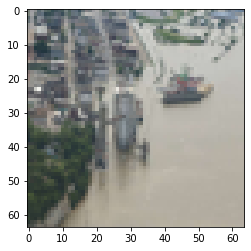

In [58]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

imgo = Image.open(streaming_body_12)
newsize = (64, 64)
img1 = imgo.resize(newsize)
im_array = np.asarray(img1)

plt.imshow(im_array)
plt.show()

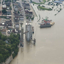

In [59]:
img1

In [60]:
x=image.img_to_array(img1)

In [61]:
x

array([[[117., 125., 119.],
        [157., 156., 160.],
        [141., 143., 145.],
        ...,
        [118., 139., 162.],
        [109., 132., 156.],
        [109., 125., 144.]],

       [[123., 131., 124.],
        [161., 161., 163.],
        [108., 117., 116.],
        ...,
        [139., 147., 154.],
        [138., 145., 149.],
        [170., 173., 173.]],

       [[ 91., 104., 107.],
        [146., 148., 150.],
        [ 70.,  84.,  90.],
        ...,
        [150., 165., 180.],
        [177., 181., 184.],
        [206., 206., 201.]],

       ...,

       [[ 51.,  64.,  50.],
        [ 45.,  55.,  49.],
        [ 41.,  51.,  47.],
        ...,
        [177., 172., 159.],
        [177., 170., 159.],
        [179., 171., 160.]],

       [[ 44.,  56.,  51.],
        [ 62.,  68.,  62.],
        [ 70.,  74.,  67.],
        ...,
        [178., 171., 160.],
        [179., 171., 160.],
        [180., 172., 161.]],

       [[ 69.,  72.,  68.],
        [ 72.,  77.,  71.],
        [ 93.,  

In [62]:
x.shape

(64, 64, 3)

In [63]:
x=np.expand_dims(x,axis=0)

In [64]:
x.shape


(1, 64, 64, 3)

In [65]:
x

array([[[[117., 125., 119.],
         [157., 156., 160.],
         [141., 143., 145.],
         ...,
         [118., 139., 162.],
         [109., 132., 156.],
         [109., 125., 144.]],

        [[123., 131., 124.],
         [161., 161., 163.],
         [108., 117., 116.],
         ...,
         [139., 147., 154.],
         [138., 145., 149.],
         [170., 173., 173.]],

        [[ 91., 104., 107.],
         [146., 148., 150.],
         [ 70.,  84.,  90.],
         ...,
         [150., 165., 180.],
         [177., 181., 184.],
         [206., 206., 201.]],

        ...,

        [[ 51.,  64.,  50.],
         [ 45.,  55.,  49.],
         [ 41.,  51.,  47.],
         ...,
         [177., 172., 159.],
         [177., 170., 159.],
         [179., 171., 160.]],

        [[ 44.,  56.,  51.],
         [ 62.,  68.,  62.],
         [ 70.,  74.,  67.],
         ...,
         [178., 171., 160.],
         [179., 171., 160.],
         [180., 172., 161.]],

        [[ 69.,  72.,  68.],
       

In [66]:
#pred=model.predict_classes(x)
y=model.predict(x)
pred=np.argmax(y,axis=1)

In [67]:
pred

array([2])

In [68]:
y

array([[0., 0., 1., 0.]], dtype=float32)

In [69]:
x_train.class_indices

{'Cyclone': 0, 'Earthquake': 1, 'Flood': 2, 'Wildfire': 3}

In [70]:
index=['Cyclone','no_yawn','not tilting head','open eyes','tilting head','yawn']
result=str(index[pred[0]])

In [71]:
result

'not tilting head'